## HalfEarth metadata

How to call the HE metadata from Contentful.

In [1]:
import requests
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
key = "XXXXXXXXXXXXXXXXXXX"  # Ben, Jose and Michelle have access to these keys and the contentful account
space_id = 'XXX' 

base_url=f"https://cdn.contentful.com/spaces/{space_id}/environments/master/entries"

headers = {'access_token': key}

r=requests.get(base_url, params=headers)

pprint(r.json())

{'items': [{'fields': {'category': 'Terrestrial Species',
                       'dataset': 'All Taxa',
                       'description': 'Maps show patterns for grid cells of '
                                      '110 x 110 km size. The cell size '
                                      'reflects the resolution at which '
                                      'currently available data, without '
                                      'further models, allow an accurate '
                                      'characterization, globally. “Richness” '
                                      'shows the count of species in a cell. '
                                      'The ‘All Groups’ layer provide a sum '
                                      '(species richness) of all currently '
                                      'shown groups at this resolution.',
                       'layer': 'Richness',
                       'layerSlug': 'all-taxa-richness',
                       'source'

Use [contentful API](https://www.contentful.com/developers/docs/references/content-delivery-api/#/reference/search-parameters/equality-operator) to query the entries by the 
`layerSlug` field. There will be entries that match slugs in the *layers table*, and also the *categories table*.

# Info Pannel

## Histograms

In landscape mode, the info pannel shows a bivarate colour matrix, with two histograms. The histograms show species richness and rarity for a user-selected taxa group.
In the future those histograms may be dynamicly calculated, but for now, they are going to be based on the below json objects.

```json
richness = {'all': [31541, 3944, 3334, 1157, 399],
            'amphibians': [4019, 3362, 2598, 887, 333],
            'birds': [31467, 3908, 3342, 1147, 399],
            'cacti': [1097, 1070, 899, 323, 73],
            'conifers': [2434, 2551, 2007, 727, 237],
            'fishes': [65408, 50302, 43343, 14979, 5451],
            'mammals': [31062, 4194, 3363, 1192, 402],
            'turtles': [1883, 2918, 1705, 666, 276]}

rarity = {'all': [31381, 3869, 3488, 1253, 385],
          'amphibians': [3960, 3098, 2839, 1013, 286],
          'birds': [30634, 4511, 3449, 1303, 367],
            'cacti': [1245, 956, 928, 323, 10],
            'conifers': [2837, 2238, 1927, 784, 169],
            'fishes': [65618, 50139, 43316, 14966, 5445],
            'mammals': [31477, 3799, 3352, 1216, 370],
            'turtles': [2633, 2061, 1834, 755, 165]}
```

The histograms can be represented as simple bar charts, they should all have the same absoloute maximum bar height. They should be plotted without x or y axis information.

In [70]:
richness = {'all': [31541, 3944, 3334, 1157, 399],
            'amphibians': [4019, 3362, 2598, 887, 333],
            'birds': [31467, 3908, 3342, 1147, 399],
            'cacti': [1097, 1070, 899, 323, 73],
            'conifers': [2434, 2551, 2007, 727, 237],
            'fishes': [65408, 50302, 43343, 14979, 5451],
            'mammals': [31062, 4194, 3363, 1192, 402],
            'turtles': [1883, 2918, 1705, 666, 276]}

rarity = {'all': [31381, 3869, 3488, 1253, 385],
          'amphibians': [3960, 3098, 2839, 1013, 286],
          'birds': [30634, 4511, 3449, 1303, 367],
            'cacti': [1245, 956, 928, 323, 10],
            'conifers': [2837, 2238, 1927, 784, 169],
            'fishes': [65618, 50139, 43316, 14966, 5445],
            'mammals': [31477, 3799, 3352, 1216, 370],
            'turtles': [2633, 2061, 1834, 755, 165]}

Example density plot bars for birds


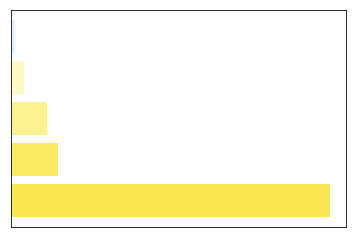

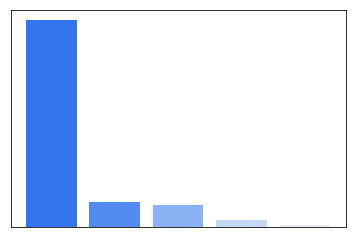

In [114]:
taxa = 'birds'

print(f"Example density plot bars for {taxa}")


plt.barh(range(0,5), rarity[taxa], color=["#fae651","#fbea62","#fcf090","#fef8c5","#e5eeff"])
plt.xticks([])
plt.yticks([])
plt.show()

plt.bar(range(0,5), richness[taxa], color=['#3474ef','#538bf0','#8bb2f5','#c5d8f9','#e5eeff'])
plt.xticks([])
plt.yticks([])
plt.show()

## Data from a Carto endpoint

`sql = (f"SELECT * FROM global_facets_attr_pressures_vizz WHERE cell_id = '{gridcell_id}'")`

In [21]:
gridcell_id = '26001'

sql = (f"SELECT  sr, ave_rsr, ave_rsr_pc, strict, biosphere, conservati, other, focal_spp, prop_land, agricultur, urban, rainfed, rank_rsr, rank_sr, taxa FROM global_facets_attr_pressures_vizz WHERE cell_id = '{gridcell_id}'")



api_key="XXXXX"

carto_url = f"https://carto.mol.org/user/half-earth/api/v2/sql"

params = {"q": sql,
         "api_key": api_key,
         "format":'json'}

table_r = requests.get(carto_url,params=params)

print(table_r.url)
print(f"response {table_r.status_code}")

pprint(table_r.json())

https://carto.mol.org/user/half-earth/api/v2/sql?q=SELECT++sr%2C+ave_rsr%2C+ave_rsr_pc%2C+strict%2C+biosphere%2C+conservati%2C+other%2C+focal_spp%2C+prop_land%2C+agricultur%2C+urban%2C+rainfed%2C+rank_rsr%2C+rank_sr%2C+taxa+FROM+global_facets_attr_pressures_vizz+WHERE+cell_id+%3D+%2726001%27&api_key=742c956aae8c74b51b6c554733a3b440fb81cbfd&format=json
response 200
{'fields': {'agricultur': {'type': 'number'},
            'ave_rsr': {'type': 'number'},
            'ave_rsr_pc': {'type': 'number'},
            'biosphere': {'type': 'number'},
            'conservati': {'type': 'number'},
            'focal_spp': {'type': 'string'},
            'other': {'type': 'number'},
            'prop_land': {'type': 'number'},
            'rainfed': {'type': 'number'},
            'rank_rsr': {'type': 'number'},
            'rank_sr': {'type': 'number'},
            'sr': {'type': 'number'},
            'strict': {'type': 'number'},
            'taxa': {'type': 'string'},
            'urban': {'typ

In [25]:
taxa = "birds"

# Extract out the taxa-relevant row from the response
for row in table_r.json().get('rows'):
    if row.get('taxa') == taxa:
        metadata = row
        
row

{'sr': 34,
 'ave_rsr': 0.000111823479197,
 'ave_rsr_pc': 5.64458204334365,
 'strict': None,
 'biosphere': None,
 'conservati': None,
 'other': None,
 'focal_spp': 'Mesoplodon peruvianus,Pterodroma longirostris',
 'prop_land': 0,
 'agricultur': 0,
 'urban': 0,
 'rainfed': 0,
 'rank_rsr': None,
 'rank_sr': None,
 'taxa': 'all'}

## Constructing the bivarate plot

The bivarate plot is made up of richness and rarity, broken into 5 bins (each). The breaks in the ricness and rarity scales differ for each taxa group, and are as follows:

```json
richness_breaks = {
                    "fishes": [305,464,658,1684,3469],
                    "conifers": [3,6,12,21,49],
                    "birds": [150,235,436,566,1010],
                    "cacti": [2,6,20,41,93],
                    "all": [187,314,607,822,1420],
                    "mammals": [28,50,118,168,225],
                    "turtles": [2,5,9,13,22],
                    "amphibians": [6,19,49,87,180]
                    }
rarity_breaks = {
    "birds":[0.000951457169688,0.002118669803344,0.004793622966076,0.014531712454054,0.345654170530923],
    "mammals":[0.001792715951431,0.003774471291193,0.009207707575509,0.022424884799749,0.154535354563766],
    "cacti":[0.002985045875918,0.013466473099952,0.069278172515258,0.246837471328683,1],
    "fishes":[0.000017408490252,0.000023022433169,0.000068605335069,0.000226333724869,0.00684126820616],
    "turtles":[0.002971514874607,0.005810064752986,0.015415800521987,0.049977196671277,1],
    "all":[0.002024310809826,0.005479986220463,0.017138521295314,0.047310862397745,0.48067781545632],
    "conifers":[0.002469027068453,0.007929522029411,0.018324173191885,0.055555470940302,1],
    "amphibians":[0.003431235180182,0.009875216978352,0.04069126767663,0.139397129600073,1]
}
```


To calculate which of the 5x5 (25) possible squares of the bivarate to highlight you only need to see which range a given taxa's Richness and Rarity falls between.

`sr` = Richness value

`ave_rsr` = Rarity value

combine `sr` and `ave_rsr` to know where 

In [27]:
import numpy as np

In [55]:
richness_breaks = {
                    "fishes": [305,464,658,1684,3469],
                    "conifers": [3,6,12,21,49],
                    "birds": [150,235,436,566,1010],
                    "cacti": [2,6,20,41,93],
                    "all": [187,314,607,822,1420],
                    "mammals": [28,50,118,168,225],
                    "turtles": [2,5,9,13,22],
                    "amphibians": [6,19,49,87,180]
                    }
rarity_breaks = {
    "birds":[0.000951457169688,0.002118669803344,0.004793622966076,0.014531712454054,0.345654170530923],
    "mammals":[0.001792715951431,0.003774471291193,0.009207707575509,0.022424884799749,0.154535354563766],
    "cacti":[0.002985045875918,0.013466473099952,0.069278172515258,0.246837471328683,1],
    "fishes":[0.000017408490252,0.000023022433169,0.000068605335069,0.000226333724869,0.00684126820616],
    "turtles":[0.002971514874607,0.005810064752986,0.015415800521987,0.049977196671277,1],
    "all":[0.002024310809826,0.005479986220463,0.017138521295314,0.047310862397745,0.48067781545632],
    "conifers":[0.002469027068453,0.007929522029411,0.018324173191885,0.055555470940302,1],
    "amphibians":[0.003431235180182,0.009875216978352,0.04069126767663,0.139397129600073,1]
}

In [56]:
taxa_richness = row.get('sr')
taxa_rarity = row.get('ave_rsr')

In [76]:
# Just to double check we got the right values
birds_rarity, birds_richness

(0.000111823479197, 34)

In [77]:
def bivarate_index(taxa_value, taxa_range):
    if taxa_value  > 0 and taxa_value <= taxa_range[0]:
        return 0
    if taxa_value  > taxa_range[0] and taxa_value <= taxa_range[1]:
        return 1
    if taxa_value  > taxa_range[1] and taxa_value <= taxa_range[2]:
        return 2
    if taxa_value  > taxa_range[2] and taxa_value <= taxa_range[3]:
        return 3
    if taxa_value  > taxa_range[3] and taxa_value <= taxa_range[4]:
        return 4
    

# find the index position of this taxa in richnes/rarity dimensions for the bivarate plot

richness_position_index = bivarate_index(birds_richness, richness_breaks.get('birds')) 

rarity_position_index = bivarate_index(birds_rarity, rarity_breaks.get('birds')) 

In [78]:
richness_position_index, rarity_position_index

(0, 0)

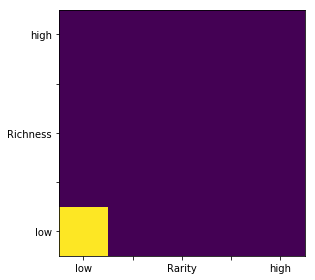

In [96]:
# Example of how to use the index to highlight a matrix (note, no colours are plotted in this example)

rarity = ["low", "", "Rarity", "","high"]
richness = ["low", "", "Richness","", "high"]

bivarate = np.array([[0, 0, 0, 0, 0, ],
                    [0, 0, 0, 0, 0,],
                    [0, 0, 0, 0, 0, ],
                    [0, 0, 0, 0, 0, ],
                    [0, 0, 0, 0, 0,]])

bivarate[richness_position_index, rarity_position_index] = 1


fig, ax = plt.subplots()
im = ax.imshow(bivarate, origin='lower')

ax.set_xticks(np.arange(len(rarity)))
ax.set_yticks(np.arange(len(richness)))
# ... and label them with the respective list entries
ax.set_xticklabels(rarity)
ax.set_yticklabels(richness)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0,
         rotation_mode="anchor")
fig.tight_layout()
plt.show()

## % protection (Mapping Conservation areas section)

For protected areas % we can grab the values from the Carto response. These values should be as a % (but keep an eye out, as it may be in fractional % (0-1), or may have a None value.
If the data are None, expose it as 0% in the widget.
Also note, that if there are a large number of values after the decimal you can round to the nearest 1%. (e.g. 9.8779933333 --> 10%)

In [101]:
row

{'sr': 34,
 'ave_rsr': 0.000111823479197,
 'ave_rsr_pc': 5.64458204334365,
 'strict': None,
 'biosphere': None,
 'conservati': None,
 'other': None,
 'focal_spp': 'Mesoplodon peruvianus,Pterodroma longirostris',
 'prop_land': 0,
 'agricultur': 0,
 'urban': 0,
 'rainfed': 0,
 'rank_rsr': None,
 'rank_sr': None,
 'taxa': 'all'}

In [108]:
#  All you need to do here is link the selector buttons to the keys in the Carto response, e.g.:

key = 'strict reserves'

conservation_areas = {"strict reserves": "strict",
                     "Biosphere reserves": "biosphere",
                     "Community-based conservation areas": "conservati",
                     "Other":"other"}

area = row[conservation_areas[key]]

if not area:
    print(f"%{key} = 0%")
else:
    print(f"%{key} = {area:3.0f}%")    

%strict reserves = 0%


## Mapping Human activites

Similar to the previous section, just a case of grabbing data from the carto query and possibly formatting/rounding, with the exception that the `All terrestrial pressures` is a combination of three other values.

In [121]:
key = "All terrestrial pressures"

human_pressure = {"All terrestrial pressures": ['agricultur', 'rainfed','urban'],
                  "Large and Irrigated Agriculture": 'agricultur',
                  "Small and Rainfed Agriculture": 'rainfed',
                  "Urban Area": 'urban'}

if key == "All terrestrial pressures":
    area = row['urban'] + row['rainfed'] + row['agricultur']
else :
    area = row[human_pressure[key]]

if not area:
    print(f"% {key} = 0%")
else:
    print(f"% {key} = {area:3.0f}%")  

% All terrestrial pressures = 0%


## Species endpoints

Using the species names from the Carto table, you can request the data from the MOL endpoints.

https://api.mol.org/1.x/species/info?scientificname=common+name

In [128]:
row.get('focal_spp')

'Mesoplodon peruvianus,Pterodroma longirostris'

In [129]:
species_list = row.get('focal_spp').split(',')

print(species_list)

['Mesoplodon peruvianus', 'Pterodroma longirostris']


In [134]:
species_object = []
for latin_name in species_list:
    url = f"https://api.mol.org/1.x/species/info?scientificname={latin_name}"
    r = requests.get(url)
    print(f"{r.url}")
    print(f"response {r.status_code}")
    if r.status_code == 200:
        species_object.append(r.json())

https://api.mol.org/1.x/species/info?scientificname=Mesoplodon%20peruvianus
response 200
https://api.mol.org/1.x/species/info?scientificname=Pterodroma%20longirostris
response 200


In [135]:
species_object

[[{'info': [{'content': "The pygmy beaked whale (Mesoplodon peruvianus), also known as the bandolero beaked whale, Peruvian beaked whale and lesser beaked whale, is the smallest of the mesoplodonts and one of the newest discoveries. There were at least two dozen sightings of an unknown beaked whale named Mesoplodon sp. A before the initial classification, and those are now believed to be synonymous with the species. The species was formally described in 1991, based on ten specimens obtained from Peru between 1976 and 1989, including a 3.72 m (12.2 ft) adult male as the type specimen. A specimen that stranded at Paracas, Peru in 1955 (first tentatively identified as Andrews' beaked whale) has since been identified as a pygmy beaked whale. Since 1987, there have been an additional 40 sightings of the species, for a total of 65 (as of 2001).",
     'source': 'Wikipedia',
     'lang': 'en'}],
   'redlist': 'DD',
   'rangemap': 'https://api.mol.org/map?name=Mesoplodon%20peruvianus',
   'seq

In [136]:
for species in species_object:
    species

In [144]:
url_link_on_image = species[0].get('rangemap')

{'info': [{'content': "The Stejneger's petrel (Pterodroma longirostris) is a species of seabird and a member of the gadfly petrels. The bird is 26–31 cm in size, with a 53–66 cm wingspan.\nThis species is highly pelagic, rarely approaching land, except to nest and rear young. It occurs in the Pacific Ocean, nesting in the Juan Fernández Islands off Chile. It is a transequatorial migrant, finding its way to subtropical waters off Japan before returning to its nesting sites. It has been reported well off the west coast of the United States.\nStejneger's petrel nests in burrows. It prefers slopes and ridges in areas of dense fern forests. The population of this bird is decreasing due to introduced cats on its breeding islands. It is considered a vulnerable species because of its restricted breeding range.\nThe common name commemorates the Norwegian ornithologist Leonhard Hess Stejneger.",
   'source': 'Wikipedia',
   'lang': 'en'}],
 'redlist': 'VU',
 'rangemap': 'https://api.mol.org/map?

In [145]:
latin_name = species[0].get('scientificname')

'Pterodroma longirostris'

In [148]:
common_name = species[0].get('commonname')
common_name

"Stejneger's Petrel"

In [150]:
iucn_category = species[0].get('redlist')
iucn_category

'VU'

In [160]:
image_data = species_object[0][0].get('image')
image_data

{'asset_id': '111cbd1ac28e4c309832fd8e29b750dd',
 'url': 'https://lh3.googleusercontent.com/A3la9WKam8HSQys4mF17neGnh47FBXzqz4UmI6UfZxXImE_6f8JqZD3gIZq-s5-R12Sz0V3FGNY1In8HezMOYuaS',
 'license': 'http://creativecommons.org/licenses/by-nc-sa/3.0/',
 'copyright': 'Smithsonian Institution, National Museum of Natural History, Department of Vertebrate Zoology, Division of Mammals'}